# Prediction of Used Car Prices - ML/AI Career Path Portfolio Project

This project focuses on a dataset that contains information of used cars from the year 1974 to 2024 such as its brand, type and model. The purpose of this project is to use machine learning algorithms and machine learning pipelines to predict used car prices. 

The original dataset was provided by Kaggle and modified by a user from Kaggle (https://www.kaggle.com/datasets/anthonytherrien/extended-dataset-for-used-car-prices-regressiont). The user had generated values using OpenAI's GPT-4o-mini for additional data points to provide more insights and potentially improve model performance. Despite these synthetic data points, the accuracy of these data points were maintained and can be assumed to replicate real-world scenarios. We will be using Python and its libraries to complete this project.

## Goal of project

1. Apply machine learning algorithms to a dataset and perform predictive analysis 
2. Create a ML pipeline to automate ML workflow

## Import Libraries

In [141]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_regression

## Load and Inspect Data

In [142]:
test_set = pd.read_csv('test.csv')
train_set = pd.read_csv('train.csv')

In [143]:
train_set.info()
train_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [144]:
test_set.info()
test_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


The training and testing dataset contains 188533 rows and 125690 rows respectively, with 13 columns containing information on used cars. It seems that all of the columns except 'fuel_type', 'clean_title' and 'accident' do not have null values.

Here's a quick summary of the columns:

- **id**: The identification number of the vehicle.
- **brand**: The manufacturer of the vehicle.
- **model**: The specific model of the vehicle produced by the brand. 
- **milage**: The milage of the vehicle. 
- **fuel_type**: The type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.
- **engine**: The engine specifications of the vehicle.
- **transmission**: The transmission type, whether automatic, manual, or another variant.
- **ext_col**: The exterior color of the vehicle.
- **int_col**: The interior color of the vehicle.
- **accident**: The vehicle's history of accidents or damages.
- **clean_title**: The availability of a clean title.
- **price**: The listed prices for the vehicle.

## Data Cleaning and Preparation

### Fuel Type

Firstly, we will deal with the 'fuel_type' column.

In [145]:
train_set.fuel_type.value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [146]:
test_set.fuel_type.value_counts()

fuel_type
Gasoline          110533
Hybrid              4676
E85 Flex Fuel       3523
Diesel              2686
–                    538
Plug-In Hybrid       337
not supported         14
Name: count, dtype: int64

Since gasoline vehicles are the most common, we will replace the '-', 'not supported' and null values with 'Gasoline'.

In [147]:
# Training set
train_set['fuel_type'].replace(['–','not supported'], 'Gasoline', inplace = True)
train_set['fuel_type'].fillna('Gasoline', inplace = True)
train_set['fuel_type'].replace('Plug-In Hybrid', 'Hybrid', inplace = True)

# Testing set
test_set['fuel_type'].replace(['–','not supported'], 'Gasoline', inplace = True)
test_set['fuel_type'].fillna('Gasoline', inplace = True)
test_set['fuel_type'].replace('Plug-In Hybrid', 'Hybrid', inplace = True)

### Clean Title

Next, we will make the 'clean_title' into a binary field by replacing 'Yes' with 1 and the null values with 0.

In [148]:
train_set.clean_title.unique()

array(['Yes', nan], dtype=object)

In [149]:
# Filling null values in training set
train_set.clean_title.replace('Yes', 1, inplace = True)
train_set.clean_title.fillna(0, inplace = True)

# Filling null values in testing set
test_set.clean_title.replace('Yes', 1, inplace = True)
test_set.clean_title.fillna(0, inplace = True)

# Changing 'clean_title' data type to bool
train_set.clean_title = train_set.clean_title.astype('bool')
test_set.clean_title = test_set.clean_title.astype('bool')

### Accidents

Lastly, we will do the same with the 'accident' column.

In [150]:
train_set.accident.unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [151]:
# Replacing values in training set
train_set.accident.replace(['No', 'None reported'], 0, inplace=True)
train_set.accident.replace('At least 1 accident or damage reported', 1, inplace=True)
train_set.accident.fillna(0, inplace=True)

# Replacing values in testing set
test_set.accident.replace(['No', 'None reported'], 0, inplace=True)
test_set.accident.replace('At least 1 accident or damage reported', 1, inplace=True)
test_set.accident.fillna(0, inplace=True)

# Changing 'accident' data type to bool
train_set.accident = train_set.accident.astype('bool')
test_set.accident = test_set.accident.astype('bool')

## Feature Engineering 

### Transmission Type

There are a lot of transmission types in the training and testing dataset. We will categorise them into 4 different types; Automatic, Manual, CVT, Dual Shift and Others.

In [152]:
test_set.transmission.value_counts().head(10)

transmission
A/T                               33132
8-Speed A/T                       13941
Transmission w/Dual Shift Mode    12824
6-Speed A/T                       12061
6-Speed M/T                        7865
7-Speed A/T                        7374
Automatic                          7175
8-Speed Automatic                  5546
10-Speed A/T                       5303
9-Speed A/T                        2584
Name: count, dtype: int64

In [153]:
auto = ['Auto', 'A/T', 'SCHEDULED', '–', 'F', 'AT', '2', '7-Speed', '6-Speed']
manual = ['Manual', 'M/T', 'MT', 'Mt']

# function for transmission 
def transmission(type):
    if any(x in type for x in auto):
        return 'Automatic'
    elif any(x in type for x in manual):
        return 'Manual'
    elif 'CVT' in type or 'Variable' in type:
        return 'CVT' 
    elif 'Dual Shift' in type:
        return 'Dual Shift Mode'
    elif 'Overdrive' in type:
        return 'Overdrive Switch'
    else:
        return 'Others'
    
train_set['transmission_type'] = train_set.transmission.apply(transmission)
test_set['transmission_type'] = test_set.transmission.apply(transmission)

In [154]:
train_set.transmission_type.value_counts()

transmission_type
Automatic           163366
Dual Shift Mode      19255
Manual                3700
CVT                   2056
Overdrive Switch       156
Name: count, dtype: int64

### Brand

We will perform frequency encoding on the 'brand' column since there are a lot of brands.

In [155]:
freq_encoding_brand_train = train_set['brand'].value_counts().to_dict()
train_set['encoded_brand'] = train_set['brand'].map(freq_encoding_brand_train)

freq_encoding_brand_test = test_set['brand'].value_counts().to_dict()
test_set['encoded_brand'] = test_set['brand'].map(freq_encoding_brand_test)

### Horsepower

We can also extract the horsepower of the engine from the 'engine' column. We will replace rows that do not have horsepower values with the mode horspower.

In [156]:
# Extracting horsepower from 'engine' column
train_set['horsepower'] = train_set['engine'].str.extract(r'(\d+\.?\d*)HP').astype(float)
test_set['horsepower'] = test_set['engine'].str.extract(r'(\d+\.?\d*)HP').astype(float)

# Filling null values with mode value
train_set['horsepower'].fillna(train_set['horsepower'].mode()[0], inplace=True)
test_set['horsepower'].fillna(test_set['horsepower'].mode()[0], inplace=True)

# Converting 'horsepower' column to int
train_set['horsepower'] = train_set['horsepower'].astype('int')
test_set['horsepower'] = test_set['horsepower'].astype('int')

### Exterior and Interior Colors

Similarly to brands, we will perform frequency encoding on the exterior and interior color columns.

In [157]:
# Frequency encoding exteriol colors in training dataset
frequency_encoding_ext_col = train_set['ext_col'].value_counts().to_dict()
train_set['encoded_ext_color'] = train_set['ext_col'].map(frequency_encoding_ext_col)

frequency_encoding_int_col = train_set['int_col'].value_counts().to_dict()
train_set['encoded_int_color'] = train_set['int_col'].map(frequency_encoding_int_col)

# Frequency encoding exteriol colors in testing dataset
frequency_encoding_ext_col = test_set['ext_col'].value_counts().to_dict()
test_set['encoded_ext_color'] = test_set['ext_col'].map(frequency_encoding_ext_col)

frequency_encoding_int_col = test_set['int_col'].value_counts().to_dict()
test_set['encoded_int_color'] = test_set['int_col'].map(frequency_encoding_int_col)

### Speed

We can extract the number of gears from the 'transmission' column and create a new column called 'Speed'.

In [158]:
train_set.transmission.value_counts().head(10)

transmission
A/T                               49904
8-Speed A/T                       20645
Transmission w/Dual Shift Mode    19255
6-Speed A/T                       18044
6-Speed M/T                       11998
7-Speed A/T                       11124
Automatic                         10691
8-Speed Automatic                  8431
10-Speed A/T                       8044
9-Speed A/T                        3866
Name: count, dtype: int64

In [159]:
# Extracting speed from training set and creating new column
train_set['speed'] = train_set['transmission'].str.extract(r'(\d+)-Speed').astype(float)
train_set['speed'].fillna(train_set.speed.mode()[0], inplace = True)

# Extracting speed from testing set and creating new column
test_set['speed'] = test_set['transmission'].str.extract(r'(\d+)-Speed').astype(float)
test_set['speed'].fillna(test_set.speed.mode()[0], inplace = True)

# Converting 'speed' column to int
train_set['speed'] = train_set['speed'].astype('int')
test_set['speed'] = test_set['speed'].astype('int')

### Litre

The volume of the cylinders in the engine can be extracted from the 'engine' column as well.

In [160]:
# Extracting litre from training set and creating new column
train_set['litres'] = train_set['engine'].str.extract(r'(\d+\.?\d*)L').astype(float)
train_set['litres'].fillna(train_set['litres'].mode()[0], inplace=True)

# Extracting litre from testing set and creating new column
test_set['litres'] = test_set['engine'].str.extract(r'(\d+\.?\d*)L').astype(float)
test_set['litres'].fillna(test_set['litres'].mode()[0], inplace=True)

### Model

In [161]:
freq_encoded_model = train_set['model'].value_counts().to_dict()
train_set['encoded_model'] = train_set['model'].map(freq_encoded_model)

test_set['encoded_model'] = test_set['model'].map(freq_encoded_model)
test_set['encoded_model'].fillna(test_set['encoded_model'].mode()[0], inplace=True)

## Feature Importances

After feature engineering, we will determine the importance of each feature to optimize our model.

In [162]:
# Feature and target variables
feature_cols = ['encoded_brand', 'model_year', 'milage', 'horsepower', 'fuel_type', 'encoded_ext_color', 'encoded_int_color', 'transmission_type', 
                'speed', 'accident', 'clean_title', 'litres', 'encoded_model']
X = train_set[feature_cols]
y = train_set.price

In [163]:
# Apply the transformations to the training data
X_preprocessed = preprocessor.fit_transform(X)
X_preprocessed = pd.DataFrame(X_preprocessed, columns=preprocessor.get_feature_names_out())

# Split the data into train and test sets
x_train_processed, x_test_processed, y_train_processed, y_test_processed = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [164]:
# Initialize the RandomForestRegressor
rf = GradientBoostingRegressor(random_state = 0, n_estimators = 300, subsample = 0.7, max_depth=8, min_samples_leaf=100, learning_rate=0.01, 
                               min_samples_split= 2)

# Fit the model to the training data
rf.fit(x_train_processed, y_train_processed)

GradientBoostingRegressor(n_estimators=300, random_state=0)

In [165]:
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to view feature importances
feature_importances = pd.DataFrame({'feature': x_train_processed.columns, 'importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Print the top 10 most important features
print(feature_importances)

                                    feature  importance
1                               num__milage    0.565369
0                           num__model_year    0.079748
4                               num__litres    0.078157
14                      freq__encoded_brand    0.061511
2                           num__horsepower    0.059900
15                  freq__encoded_ext_color    0.052275
3                                num__speed    0.044052
16                  freq__encoded_int_color    0.027933
17                      freq__encoded_model    0.022684
12                            bin__accident    0.003100
13                         bin__clean_title    0.002648
6    cat__transmission_type_Dual Shift Mode    0.001389
9              cat__fuel_type_E85 Flex Fuel    0.000528
10                  cat__fuel_type_Gasoline    0.000429
11                    cat__fuel_type_Hybrid    0.000279
8   cat__transmission_type_Overdrive Switch    0.000000
7             cat__transmission_type_Manual    0

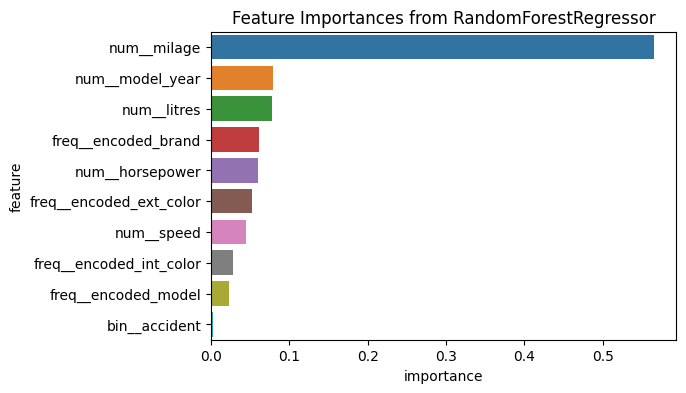

In [166]:
plt.figure(figsize=(6, 4))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title('Feature Importances from RandomForestRegressor')
plt.show()

In [211]:
# Select the top 10 most important features
top_features = feature_importances['feature'].head(10)
x_train_top = x_train_processed[top_features]
x_test_top = x_train_processed[top_features]

## Model Selection and Evaluation

After performing feature engineering, we can create a data pipeline to automate the machine learning workflow and streamline the code. We will first separate feature columns by categorical, numerical and binary.

In [235]:
# Separate column types
feature_cols = ['encoded_brand', 'model_year', 'milage', 'horsepower', 'fuel_type', 'encoded_ext_color', 'encoded_int_color', 'transmission_type', 
                'speed', 'accident', 'clean_title', 'litres', 'encoded_model']
X = train_set[feature_cols]
y = train_set.price

num_cols = ['model_year', 'milage', 'horsepower', 'speed', 'litres']
cat_cols = ['transmission_type', 'fuel_type']
freq_cols = ['encoded_brand', 'encoded_ext_color', 'encoded_int_color', 'encoded_model']
bin_cols = X.select_dtypes(include='bool').columns  # Columns with boolean values 

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),  # Scale numerical columns
          # One-Hot Encode categorical columns
        ('freq', 'passthrough', freq_cols),
        ('bin', 'passthrough', bin_cols)    # Keep binary columns as they are
    ])

In [242]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

pipeline_gbr = Pipeline([('preprocess', preprocessor), ('regressor', GradientBoostingRegressor(random_state = 0, 
                                                                                       n_estimators = 600, subsample = 0.8,
                                                                                       max_depth=8, min_samples_leaf=90,  # Increase min samples per leaf
                                                                                       learning_rate=0.01, min_samples_split= 8,  # Increase min samples per split
                                                                                        ))])

In [495]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE to positive and take the square root to get RMSE
rmse_scores = (-cv_scores) ** 0.5

# Display the RMSE for each fold and the average RMSE
print("RMSE for each fold: ", rmse_scores)
print("Average RMSE: ", rmse_scores.mean())

RMSE for each fold:  [82829.34384411 69507.25033713 80899.79919738 67968.77838999
 81069.88190364]
Average RMSE:  76455.01073445051


In [243]:
# Fit the pipeline on the training data and predict on test set
pipeline_gbr.fit(x_train, y_train)
y_pred = pipeline_gbr.predict(x_test)

#Pipeline score
train_score = pipeline_gbr.score(x_train, y_train)
test_score = pipeline_gbr.score(x_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

# Mean squared error score
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(1/2)
print(f'Root Mean Squared Error: {rmse}')

Train Score: 0.1942275943005244
Test Score: 0.17416884437169722
Root Mean Squared Error: 65419.495618995585


### XGBoost

In [153]:
import xgboost as xgb
pipeline_xg = Pipeline([('preprocess', preprocessor), ('regressor', xgb.XGBRegressor(n_estimators=500,        # Number of boosting rounds (trees)
                                                                                              max_depth=2,             # Maximum depth of a tree
                                                                                              learning_rate=0.1,       # Shrinks the contribution of each tree
                                                                                              subsample=0.8,           # Subsample ratio of the training instances
                                                                                              colsample_bytree=0.8,    # Subsample ratio of columns when constructing each tree
                                                                                              random_state=0  # Ensures reproducibility
                                                                                              ))])

In [152]:
# Fit the pipeline on the training data and predict on the test data
pipeline_xg.fit(x_train, y_train)
y_pred = pipeline_xg.predict(x_test)

#XGBoost score
train_score = pipeline_xg.score(x_train, y_train)
test_score = pipeline_xg.score(x_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

# Mean squared error score
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(1/2)
print(f'Root Mean Squared Error: {rmse}')

Train Score: 0.15036043712861602
Test Score: 0.1615566745337158
Root Mean Squared Error: 65917.14906198425


## Hyperparameter Tuning

Once we have selected a model, it can be tuned for better performance. Hyperparameter tuning is essential in making sure that the model does not overfit or underfit the data. We will use RandomizedSearchCV (RSV), instead of GridSearchCV as the processing time for RSV is much shorter than GridSearchCV.

### RandomizedSearchCV

In [247]:
param_grid = {
    'regressor__n_estimators': [400, 500, 600],
    'regressor__max_depth': [8],
    'regressor__min_samples_split': [8],
    'regressor__min_samples_leaf': [90, 100],
    'regressor__subsample': [0.5, 0.7, 1.0]
}

# Grid search using previous pipeline
rsv = RandomizedSearchCV(estimator=pipeline, param_distributions = param_grid, cv=2, scoring='neg_mean_squared_error', 
                         verbose = 1, n_iter =10, n_jobs = -1)

In [248]:
# Fit rsv using training data and print best score
rsv.fit(x_train, y_train)
best_rf = rsv.best_estimator_

# Evaluate the model on the test set
y_pred = best_rf.predict(x_test)
print(rsv.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
{'regressor__subsample': 0.7, 'regressor__n_estimators': 600, 'regressor__min_samples_split': 8, 'regressor__min_samples_leaf': 100, 'regressor__max_depth': 8}


In [208]:
train_score = best_rf.score(x_train, y_train)
test_score = best_rf.score(x_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(1/2)
print(f'Mean Squared Error: {rmse}')

Train Score: 0.18751877732541378
Test Score: 0.1738437158851147
Mean Squared Error: 65432.372130377065


### GridSearchCV

In [216]:
param_grid = {
    'regressor__n_estimators': [400, 500],
    'regressor__max_depth': [8],
    'regressor__min_samples_split': [8],
    'regressor__min_samples_leaf': [80,90,100]
}

gs = GridSearchCV(estimator=pipeline, param_grid = param_grid, cv=2, scoring='neg_mean_squared_error', 
                         verbose = 1, n_jobs = -1)

In [217]:
# Fit rsv using training data and print best score
gs.fit(x_train, y_train)
best_gs = gs.best_estimator_

# Evaluate the model on the test set
y_pred = best_gs.predict(x_test)
print(gs.best_params_)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
{'regressor__max_depth': 8, 'regressor__min_samples_leaf': 90, 'regressor__min_samples_split': 8, 'regressor__n_estimators': 500}


In [218]:
train_score = best_gs.score(x_train, y_train)
test_score = best_gs.score(x_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(1/2)
print(f'Mean Squared Error: {rmse}')

Train Score: 0.18744813216641876
Test Score: 0.17424068575162388
Mean Squared Error: 65416.650043950016


## Model Validation

We will now use our model on unseen data to try to predict the used car prices.

In [244]:
# Predicting car price
test = test_set[feature_cols]
y_pred_test = pipeline_gbr.predict(test)
price_test = pd.Series(y_pred_test)

In [245]:
# Combining car id and predicted price 
car_id = test_set.id
final_df = pd.concat([car_id, price_test], axis = 1)

# Renaming columns
final_df.rename(columns = {0:'price'}, inplace = True)
final_df.head()

,id,price
0,188533,17849.792344
1,188534,66194.546486
2,188535,55653.554368
3,188536,28275.162130
4,188537,29465.760914


## Exporting price values to file

In [246]:
import os
path = r'C:\Users\user\Downloads'
final_df.to_csv(os.path.join(path,r'predicted_car_prices.csv'))